데이터 시각화에는 때때로 집계 또는 추정 단계가 포함되며, 여기에서 여러 데이터 포인트가 평균 또는 중앙값과 같은 요약 통계로 축소됩니다. 요약 통계를 표시할 때 일반적으로 요약이 기본 데이터 포인트를 얼마나 잘 나타내는지에 대한 시각적 단서를 제공하는 오차 막대를 추가하는 것이 적절합니다 .

여러 seaborn 함수는 전체 데이터 세트가 제공될 때 요약 통계와 오류 막대를 모두 자동으로 계산합니다. 이 장에서는 오류 막대에 표시되는 내용을 제어하는 ​​방법과 seaborn에서 제공하는 각 옵션을 선택할 수 있는 이유에 대해 설명합니다.

중심 경향의 추정치 주변의 오차 막대는 추정치에 대한 불확실성의 범위 또는 그 주변의 기본 데이터의 확산이라는 두 가지 일반적인 사항 중 하나를 보여줄 수 있습니다. 이러한 측정값은 서로 관련되어 있습니다. 동일한 샘플 크기가 주어지면 데이터가 더 넓게 퍼질수록 추정치가 더 불확실해집니다. 그러나 샘플 크기가 커짐에 따라 불확실성은 감소하지만 스프레드는 그렇지 않습니다.

Seaborn에서는 각 종류의 오차 막대를 구성하는 두 가지 접근 방식이 있습니다. 한 가지 접근 방식은 분포 모양에 대한 가정에 의존하는 공식을 사용하는 파라메트릭 방식입니다. 다른 접근 방식은 귀하가 제공한 데이터만 사용하는 비모수적 접근 방식입니다.

errorbar플로팅의 일부로 추정을 수행하는 각 함수에 대해 존재하는 매개변수 로 선택합니다 . 이 매개변수는 사용할 방법의 이름과 선택적으로 간격의 크기를 제어하는 ​​매개변수를 허용합니다. 선택 항목은 표시되는 내용과 구성 방식에 따라 달라지는 2D 분류법에서 정의할 수 있습니다.



In [3]:
def plot_errorbars(arg, **kws):
    np.random.seed(sum(map(ord, "error_bars")))
    x = np.random.normal(0, 1, 100)
    f, axs = plt.subplots(2, figsize=(7, 2), sharex=True, layout="tight")
    sns.pointplot(x=x, errorbar=arg, **kws, capsize=.3, ax=axs[0])
    sns.stripplot(x=x, jitter=.3, ax=axs[1])

# 데이터 확산 측정 

데이터 스프레드를 나타내는 오차 막대는 boxplot()5개 이상을 사용하고 violinplot()복잡한 알고리즘을 사용하는 세 개의 숫자를 사용하여 분포를 간략하게 표시합니다.



# 표준 편차 오류 막대

표준 편차는 친숙한 통계이기 때문에 표준 편차 오차 막대는 설명하기 가장 간단합니다. 각 데이터 포인트에서 샘플 평균까지의 평균 거리입니다. 기본적으로 errorbar="sd"추정치 주위에 +/- 1sd에 오류 막대를 그리지만 스케일링 크기 매개변수를 전달하여 범위를 늘릴 수 있습니다. 정규 분포된 데이터를 가정하면 데이터의 ~68%가 1 표준 편차 내에 있고 ~95%가 2 내에 있고 ~99.7%가 3 내에 있습니다.

In [21]:
import numpy as np
import seaborn as sns
import seaborn.objects as so
import matplotlib.pyplot as plt
sns.set_style("darkgrid")

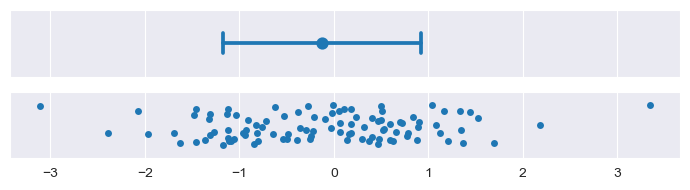

In [30]:
plot_errorbars("sd")

# 백분위수 간격 오차 막대

백분위수 간격은 또한 일부 데이터 양이 떨어지는 범위를 나타내지만 샘플에서 직접 해당 백분위수를 계산하여 그렇게 합니다. 기본적으로 errorbar="pi"2.5에서 97.5 백분위수 범위의 95% 간격을 표시합니다. 예를 들어 사분위수 범위를 표시하기 위해 크기 매개변수를 전달하여 다른 범위를 선택할 수 있습니다.



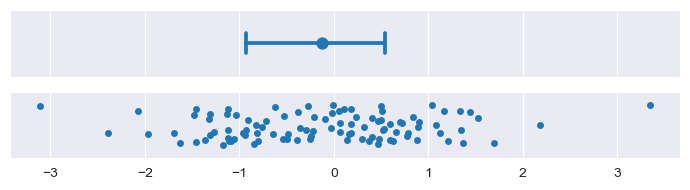

In [29]:
plot_errorbars(("pi", 50))

# 표준 오차 막대 

표준 오차 통계는 표준 편차와 관련이 있습니다. 사실 이것은 표준 편차를 샘플 크기의 제곱근으로 나눈 것입니다. 기본값인 는 errorbar="se"평균에서 간격 +/-1 표준 오차를 그립니다.

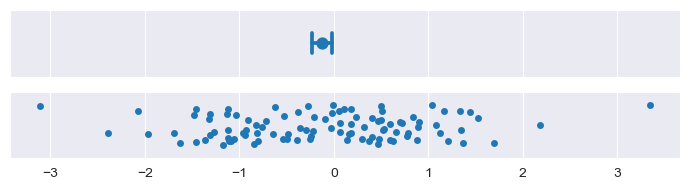

In [28]:
plot_errorbars("se")

# 신뢰 구간 오차 막대

신뢰 구간은 부트스트랩 분포 의 백분위수 구간을 취하여 구성됩니다 . 기본적으로 errorbar="ci"95% 신뢰 구간을 그립니다.

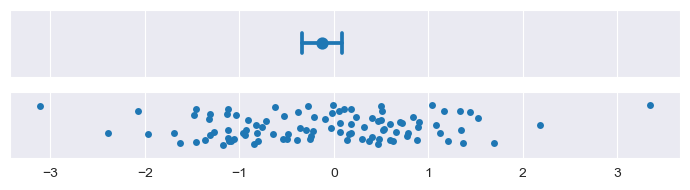

In [27]:
plot_errorbars("ci")

파라메트릭 신뢰 구간을 그리려면 위에서 언급한 것과 유사한 공식을 사용하여 표준 오차를 조정합니다. 예를 들어 대략적인 95% 신뢰 구간은 평균 +/- 2개의 표준 오차를 취하여 구성할 수 있습니다.



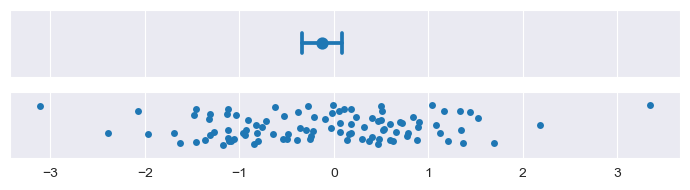

In [26]:
plot_errorbars(("se", 2))

비모수적 부트스트랩은 백분위수 간격과 유사한 이점이 있습니다. 즉, 표준 오류 간격이 할 수 없는 방식으로 왜곡되고 제한된 데이터에 자연스럽게 적응합니다. 또한 더 일반적입니다. 표준 오차 공식은 평균에 따라 다르지만 모든 추정기에 대한 부트스트랩을 사용하여 오차 막대를 계산할 수 있습니다.

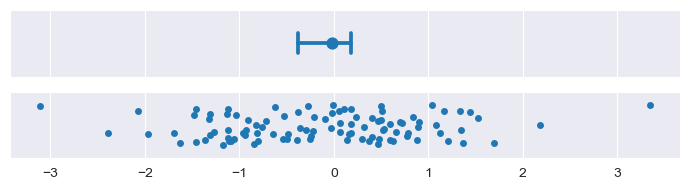

In [25]:
plot_errorbars("ci", estimator="median")

부트스트래핑에는 임의성이 포함되며 오류 막대를 생성하는 코드를 실행할 때마다 오류 막대가 약간 다르게 나타납니다. 몇 가지 매개변수가 이를 제어합니다. 하나는 반복 횟수( n_boot)를 설정합니다. 반복이 많을수록 결과 간격이 더 안정적입니다. 다른 하나는 seed동일한 결과를 보장하는 난수 생성기에 대해 를 설정합니다.

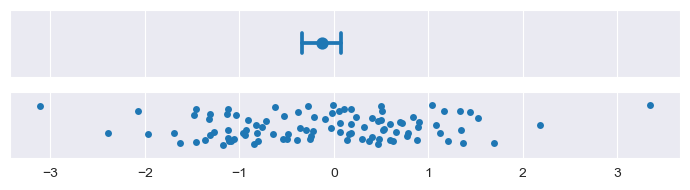

In [24]:
plot_errorbars("ci", n_boot=5000, seed=10)

# 맞춤 오차 막대 

이러한 레시피가 충분하지 않은 경우 일반 함수를 매개변수에 전달할 수도 있습니다 errorbar. 이 함수는 벡터를 가져와 간격의 최소 및 최대 지점을 나타내는 값 쌍을 생성해야 합니다.

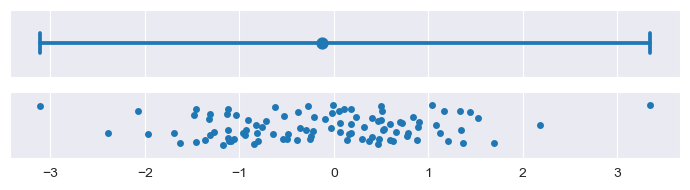

In [23]:
plot_errorbars(lambda x: (x.min(), x.max()))

# 회귀 적합도의 오차 막대

이전 논의에서는 집계 데이터에 대한 매개변수 추정치 주변에 표시된 오차 막대에 초점을 맞췄습니다. 관계를 시각화하기 위해 회귀 모델을 추정할 때 seaborn에서도 오차 막대가 발생합니다. 여기에서 오류 막대는 회귀선 주위의 "밴드"로 표시됩니다.



<AxesSubplot:>

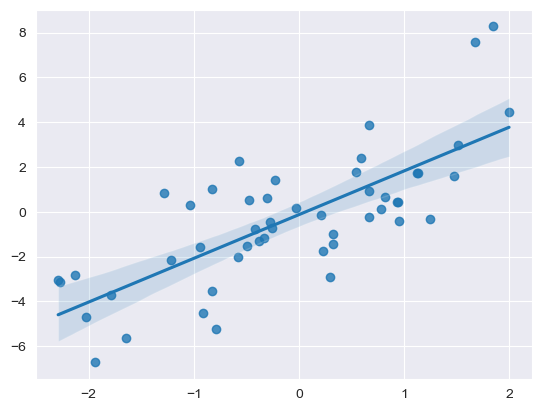

In [22]:
x = np.random.normal(0, 1, 50)
y = x * 2 + np.random.normal(0, 2, size=x.size)
sns.regplot(x=x, y=y)